In [1]:
pwd

'D:\\GAISSA\\energy-repo\\last_repo\\energy-ml-serving\\experiments'

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from datetime import datetime
import matplotlib.dates as mdates


In [3]:
new_directory = "D:/GAISSA/energy-repo/last_repo/june_cpu/"

# Change the current directory
os.chdir(new_directory)

In [6]:
results_dir = new_directory + 'results_1/processed/'
ENERGIBRIDGE_SAVE_CSV = 'energibridge_dataset.csv'
NVIDIA_SAVE_CSV = 'nvidia-smi_dataset.csv'
WATTMETER_SAVE_CSV = 'wattmeter_dataset.csv'

In [7]:
file_name = results_dir + ENERGIBRIDGE_SAVE_CSV
df = pd.read_csv(file_name, )#index_col='System Time'
df.head()

,Delta,Time,time,runtime,model,CORE0_ENERGY (J),CORE0_FREQ (MHZ),CORE0_PSTATE,CORE0_VOLT (V),CORE10_ENERGY (J),...,CPU_USAGE_4,CPU_USAGE_5,CPU_USAGE_6,CPU_USAGE_7,CPU_USAGE_8,CPU_USAGE_9,TOTAL_MEMORY,TOTAL_SWAP,USED_MEMORY,USED_SWAP
0,0,1718066831700,2024-06-11 02:47:11.700,idle,idle,239843.744553,5500.000000,0,0.08125,45711.183792,...,57.142860,0.000000,0.000000,0.000000,0.000000,0.0,66575933440,2147479552,2952658944,0
1,199,1718066831700,2024-06-11 02:47:11.700,idle,idle,239843.744827,5500.000000,0,0.08750,45711.184052,...,57.142860,0.000000,0.000000,0.000000,0.000000,0.0,66575933440,2147479552,2957819904,0
2,199,1718066831900,2024-06-11 02:47:11.900,idle,idle,239844.041260,5500.000000,0,0.12500,45711.196350,...,76.190475,4.761905,0.000000,0.000000,0.000000,0.0,66575933440,2147479552,3056799744,0
3,199,1718066832101,2024-06-11 02:47:12.101,idle,idle,239844.727921,3600.000000,1,0.04375,45711.211670,...,0.000000,0.000000,0.000000,0.000000,76.190475,0.0,66575933440,2147479552,3107680256,0
4,199,1718066832301,2024-06-11 02:47:12.301,idle,idle,239844.850082,3142.857143,1,0.10000,45711.252060,...,0.000000,0.000000,5.263158,15.789473,90.000000,0.0,66575933440,2147479552,3155484672,0


In [8]:
print(df.columns)

Index(['Delta', 'Time', 'time', 'runtime', 'model', 'CORE0_ENERGY (J)',
       'CORE0_FREQ (MHZ)', 'CORE0_PSTATE', 'CORE0_VOLT (V)',
       'CORE10_ENERGY (J)',
       ...
       'CPU_USAGE_4', 'CPU_USAGE_5', 'CPU_USAGE_6', 'CPU_USAGE_7',
       'CPU_USAGE_8', 'CPU_USAGE_9', 'TOTAL_MEMORY', 'TOTAL_SWAP',
       'USED_MEMORY', 'USED_SWAP'],
      dtype='object', length=138)


In [9]:
df['CPU_ENERGY (J)'][9990:10020]

9990     5.308668e+06
9991     5.308685e+06
9992     5.308703e+06
9993     5.308721e+06
9994     5.308739e+06
9995     5.308757e+06
9996     5.308775e+06
9997     5.308793e+06
9998     5.308811e+06
9999     5.308829e+06
10000    5.308846e+06
10001    5.308864e+06
10002    5.308882e+06
10003    5.308900e+06
10004    5.308918e+06
10005    5.308936e+06
10006    5.308954e+06
10007    5.308972e+06
10008    5.308989e+06
10009    5.309007e+06
10010    5.309025e+06
10011    5.309043e+06
10012    5.309061e+06
10013    5.309079e+06
10014    5.309097e+06
10015    5.309115e+06
10016    5.309133e+06
10017    5.309151e+06
10018    5.309168e+06
10019    5.309186e+06
Name: CPU_ENERGY (J), dtype: float64

In [10]:
energy_columns = ['CPU_ENERGY (J)', 'TOTAL_MEMORY', 'TOTAL_SWAP', 'USED_MEMORY', 'USED_SWAP']
#selected_columns = ['time','runtime','model','CPU_ENERGY (J)', 'TOTAL_MEMORY', 'TOTAL_SWAP', 'USED_MEMORY', 'USED_SWAP']

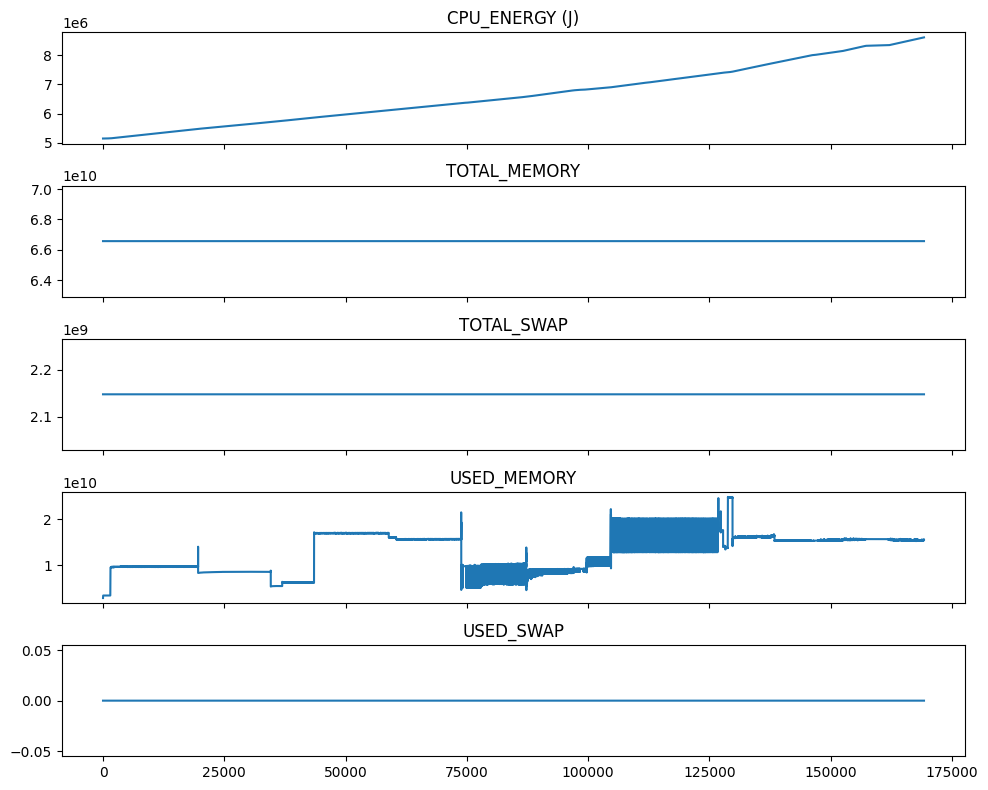

In [11]:
# Plotting time series for energy columns
fig, axs = plt.subplots(len(energy_columns), 1, figsize=(10, 8), sharex=True)

for i, col in enumerate(energy_columns):
    df[col].plot(ax=axs[i], title=col)

# Improve spacing
plt.tight_layout()

# Show plot
plt.show()

In [12]:
file_name = results_dir + 'time_marks.csv'
marks_df = pd.read_csv(file_name, )#index_col='System Time'
marks_df.head()

,time,runtime,model,engine,model_name,start_end,file,label,duration,label_time
0,2024-06-11 02:47:11.000000,-,IDLE,NaN,NaN,NaN,runall,idle,NaN,-_IDLE_inference
1,2024-06-11 02:52:11.000000,torch,START,NaN,NaN,NaN,runall,torch_START,300.000000,torch_START_inference
2,2024-06-11 02:52:12.257309,NaN,NaN,torch,pythia1-4b,1.0,load_times,torch_pythia1-4b,1.257309,NaN
3,2024-06-11 02:52:14.135294,NaN,NaN,torch,pythia1-4b,0.0,load_times,torch_pythia1-4b,1.877985,torch_pythia1-4b_load
4,2024-06-11 03:52:31.000000,torch,pythia1-4b,NaN,NaN,NaN,runall,torch_pythia1-4b,3616.864706,torch_pythia1-4b_inference


In [11]:
# when Delta is 0, starts  the data of another model, if 1 then the model finished
#df.loc[df['Delta'] == 0 ]

In [12]:
#datetimes = df.loc[df['Delta'] == 1 ]['time']

In [13]:
my_columns = energy_columns

In [14]:
datetimes = pd.to_datetime(marks_df['time'])

In [15]:
datetimes

0    2024-06-11 02:47:11.000000
1    2024-06-11 02:52:11.000000
2    2024-06-11 02:52:12.257309
3    2024-06-11 02:52:14.135294
4    2024-06-11 03:52:31.000000
                ...            
61   2024-06-11 11:16:05.000000
62   2024-06-11 11:16:05.957957
63   2024-06-11 11:16:07.205499
64   2024-06-11 12:11:46.000000
65   2024-06-11 12:11:47.000000
Name: time, Length: 66, dtype: datetime64[ns]

In [16]:

#datetimes = [datetime.strptime(dt, "%Y-%m-%d %H:%M:%S.%f") for dt in datetimes]

In [17]:
#df = marks_df.copy()
df.index = pd.to_datetime(df['time'], format='%Y-%m-%d %H:%M:%S.%f')

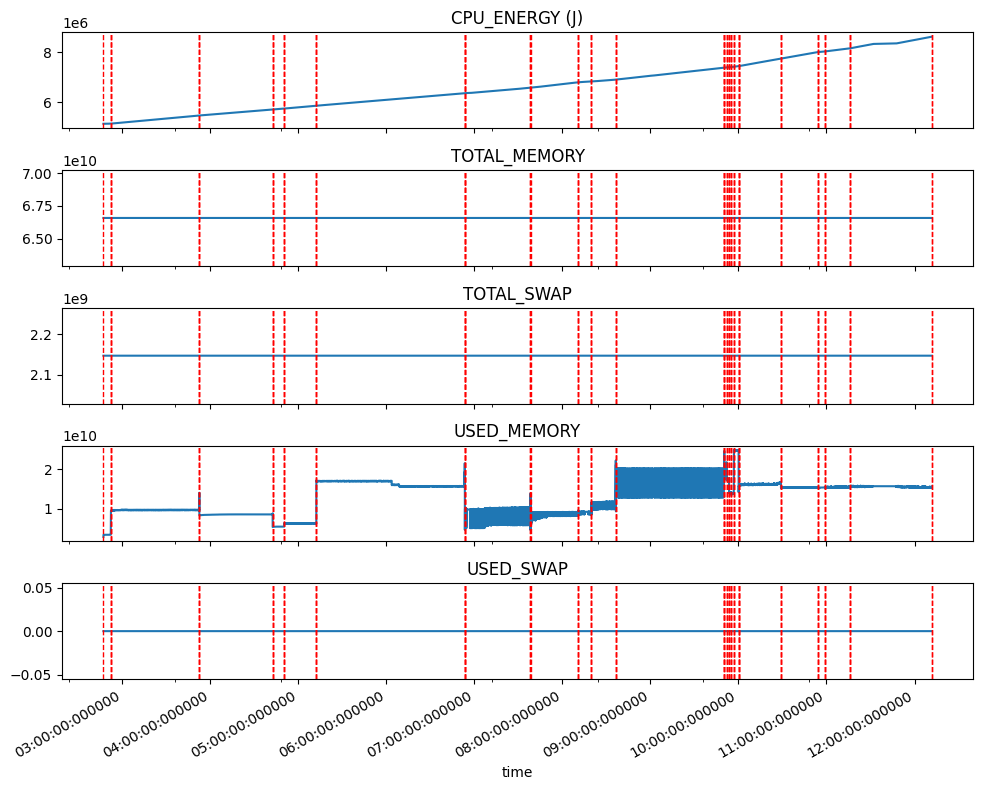

In [18]:
#import pandas as pd
#import matplotlib.pyplot as plt
#import matplotlib.dates as mdates

# Example DataFrame index parsing for demonstration
# Assuming the index is datetime with a specific format, adjust accordingly

# Define times for vertical lines, ensuring they match your DataFrame's time range and format
# This example assumes you need to adjust this part to match your actual data
vertical_lines_times = marks_df['time']
# Convert these strings to datetime objects that match your DataFrame's index format
vertical_lines_datetimes = pd.to_datetime(vertical_lines_times, format='%Y-%m-%d %H:%M:%S.%f') #  format='%H:%M:%S' %f
#vertical_initial_datetimes = pd.to_datetime(initial_runtime_times, format='%H:%M:%S') # %f


#df.set_index('time', inplace=True)

fig, axs = plt.subplots(len(my_columns), 1, figsize=(10, 8), sharex=True)

for i, col in enumerate(my_columns):
    df[col].plot(ax=axs[i], title=col)
    for dt in vertical_lines_datetimes:
        axs[i].axvline(dt, color='r', linestyle='--', lw=1)
    #for dt in vertical_initial_datetimes:
    #    axs[i].axvline(dt, color='b', linestyle='--', lw=2)

# If your DataFrame's index is very specific, consider setting the formatter for the x-axis
axs[-1].xaxis.set_major_formatter(mdates.DateFormatter('%H:%M:%S:%f'))

plt.savefig('results06.svg')

plt.tight_layout()
plt.show()



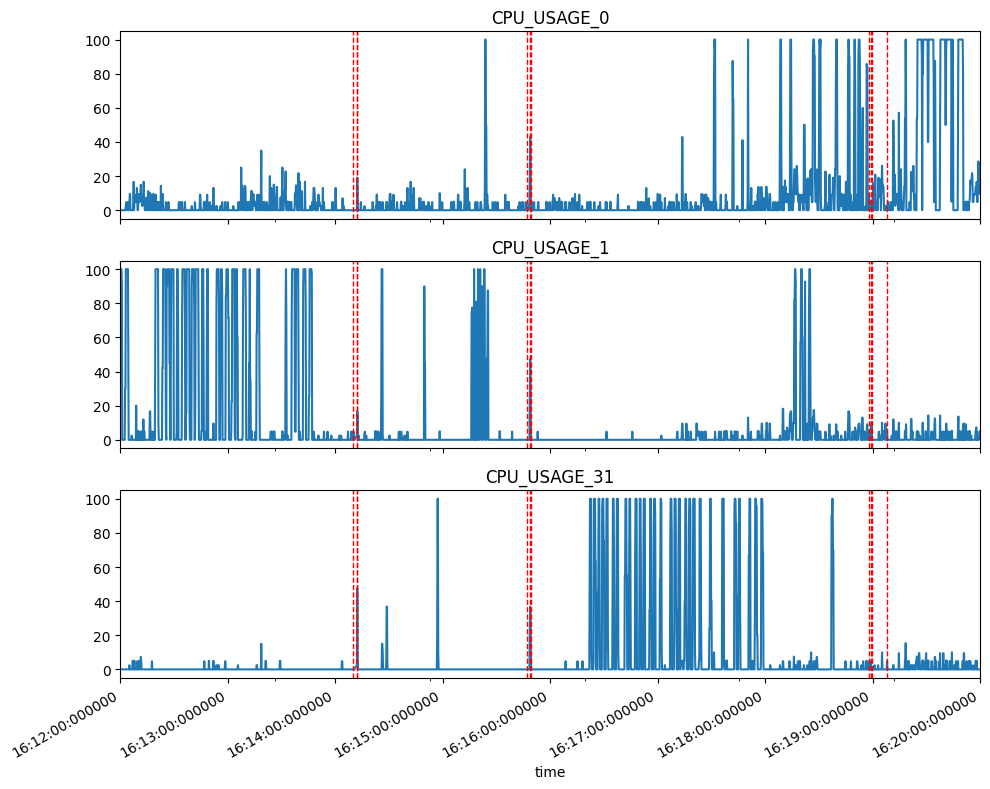

In [73]:
# ZOOM


vertical_lines_times = marks_df['time']
# Convert these strings to datetime objects that match your DataFrame's index format
vertical_lines_datetimes = pd.to_datetime(vertical_lines_times, format='%Y-%m-%d %H:%M:%S.%f') #  format='%H:%M:%S' %f
#vertical_initial_datetimes = pd.to_datetime(initial_runtime_times, format='%H:%M:%S') # %f


#df.set_index('time', inplace=True)

fig, axs = plt.subplots(len(my_columns), 1, figsize=(10, 8), sharex=True)

for i, col in enumerate(my_columns):
    df[col].plot(ax=axs[i], title=col)
    for dt in vertical_lines_datetimes:
        axs[i].axvline(dt, color='r', linestyle='--', lw=1)
    #for dt in vertical_initial_datetimes:
    #    axs[i].axvline(dt, color='b', linestyle='--', lw=2)

# If your DataFrame's index is very specific, consider setting the formatter for the x-axis
axs[-1].xaxis.set_major_formatter(mdates.DateFormatter('%H:%M:%S:%f'))

plt.savefig('results06.svg')

# Define the start and end times
start_time = pd.to_datetime('2024-06-06 16:12:00')
end_time = pd.to_datetime('2024-06-06 16:20:00')

# Set x-axis limits according to start_time and end_time
axs[-1].set_xlim(start_time, end_time)

plt.tight_layout()
plt.show()

In [19]:
file_name = results_dir + 'energi_processed.csv'
energi_2 = pd.read_csv(file_name, )#index_col='System Time'
energi_2.head()

,time,runtime,model,CPU_ENERGY (J),TOTAL_MEMORY,TOTAL_SWAP,USED_MEMORY,USED_SWAP,AVG_CPU_USAGE,label,avg_TOTAL_MEMORY,avg_TOTAL_SWAP,avg_USED_MEMORY,avg_USED_SWAP,energy
0,2024-06-11 02:47:11.700,idle,idle,5.151461e+06,66575933440,2147479552,2952658944,0,3.774435,idle_idle,6.657593e+10,2.147480e+09,3.500506e+09,0.0,5473.394531
1,2024-06-11 02:47:11.700,idle,idle,5.151461e+06,66575933440,2147479552,2957819904,0,3.774435,idle_idle,6.657593e+10,2.147480e+09,3.500506e+09,0.0,5473.394531
2,2024-06-11 02:47:11.900,idle,idle,5.151473e+06,66575933440,2147479552,3056799744,0,4.672619,idle_idle,6.657593e+10,2.147480e+09,3.500506e+09,0.0,5473.394531
3,2024-06-11 02:47:12.101,idle,idle,5.151484e+06,66575933440,2147479552,3107680256,0,5.505952,idle_idle,6.657593e+10,2.147480e+09,3.500506e+09,0.0,5473.394531
4,2024-06-11 02:47:12.301,idle,idle,5.151497e+06,66575933440,2147479552,3155484672,0,5.562521,idle_idle,6.657593e+10,2.147480e+09,3.500506e+09,0.0,5473.394531


In [20]:
energi_2.columns

Index(['time', 'runtime', 'model', 'CPU_ENERGY (J)', 'TOTAL_MEMORY',
       'TOTAL_SWAP', 'USED_MEMORY', 'USED_SWAP', 'AVG_CPU_USAGE', 'label',
       'avg_TOTAL_MEMORY', 'avg_TOTAL_SWAP', 'avg_USED_MEMORY',
       'avg_USED_SWAP', 'energy'],
      dtype='object')

In [21]:
energy_columns = ['CPU_ENERGY (J)','energy', 'avg_USED_MEMORY', 'AVG_CPU_USAGE']


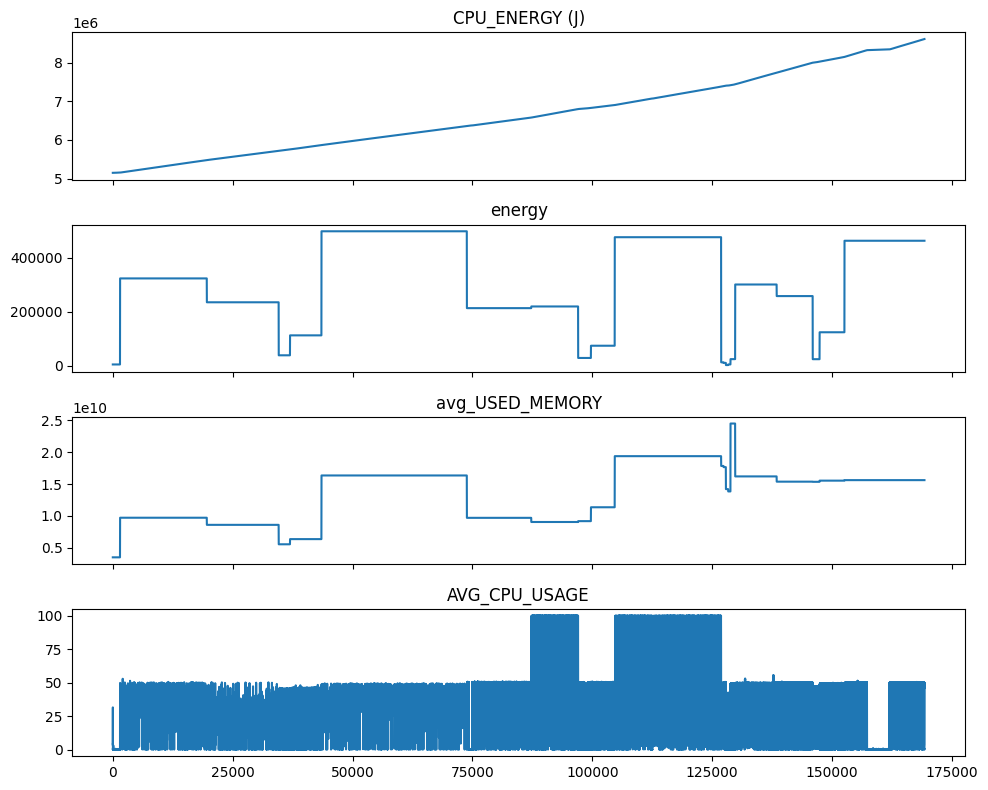

In [22]:
# Plotting time series for energy columns
fig, axs = plt.subplots(len(energy_columns), 1, figsize=(10, 8), sharex=True)

for i, col in enumerate(energy_columns):
    energi_2[col].plot(ax=axs[i], title=col)

# Improve spacing
plt.tight_layout()

# Show plot
plt.show()